#### Rastreamento :
###### Método de Lucas-Kanade

In [3]:
import numpy as np
import cv2
import time
draw = False
point = (0,0)


def mouse_draw(mouse_click,x,y,flags,param):
    global point,draw

    if mouse_click == cv2.EVENT_LBUTTONDOWN:
        draw = True
        point = (x,y)

        
cap = cv2.VideoCapture('carros.mp4')
cv2.namedWindow('frame')
cv2.setMouseCallback('frame',mouse_draw)


# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

#Colors
color = np.random.randint(0,255,(100,3))

ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

mask = np.zeros_like(old_frame)
points = np.empty(0)

while True:
    ret,frame = cap.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    img = frame
    if draw == True :
        if len(points) >= 0:
            points = np.array([[point[0],point[1]]]).astype('float32')
            points = points.reshape(-1,1,2)
            draw = False

    if len(points)>0:
        #Optical Flow
        p1,st,err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, points, None, **lk_params)
        
        #Atualizar Pontos
        good_new = p1[st==1]
        good_old = points[st==1]
        
        for i,(new,old) in enumerate(zip(good_new,good_old)):
            a,b = new.ravel()
            c,d = old.ravel()
            mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
            frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
            img = cv2.add(frame,mask)

        
    
    cv2.imshow('frame',img)

    
    if cv2.waitKey(30) == ord('q'):
        break
    old_gray = frame_gray.copy()
    if len(points)>0:
        points = good_new.reshape(-1,1,2)

        
cap.release()
cv2.destroyAllWindows()



## Esse script foi criado baseado no Tutorial de optical flow do opencv + meus conhecimentos de eventos do mouse numpy
#url : https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_video/py_lucas_kanade/py_lucas_kanade.html

##### Explicações:
##### Nesse script o usuário pode gerar um ponto na imagem através do clique do mouse e através do Método de Lucas Kanade o qual calcula para onde o ponto deverá ir

In [1]:
import matplotlib.pyplot as plt

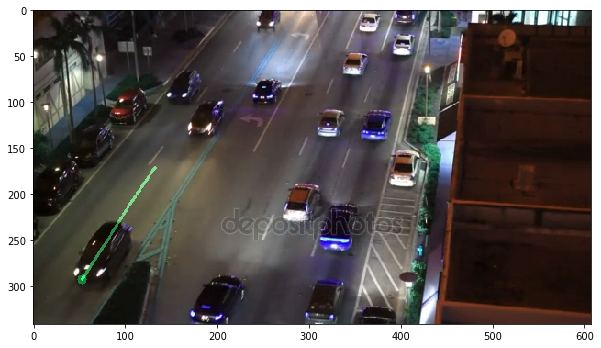

In [4]:
img = cv2.imread('frame1.png')

plt.figure(figsize = (10,10))
plt.imshow(img)
